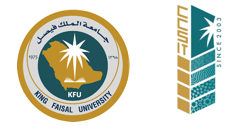

<h1><center>
King Faisal University <br>
College of Computer Sciences and Information Technology <br>
CS323: Digital Image Processing – Practical Class 
</h1>


<strong>
<center>[0921 - 323]: [Digital Image Processing]
<br><br>
<center>Section: [Male/Female]
<br><br><br><br>

<center>Lab [07]: [Fundamentals of Image Segmentation]
<br><br><br><br>

<center> Date: [Feb 27, 2022]
<center> Time: []
<br><br>


<center> Instructor: []
</strong>

# Introduction

Image segmentation is the partitioning of an image into distinct regions or categories that correspond to different objects or parts of objects. Each region contains pixels with similar attributes, and each pixel in an image is allocated to one of these categories. A good segmentation is typically one in which pixels in the same category have similar intensity values and form a connected region, whereas the neighboring pixels that are in different categories have dissimilar values. The goal of this is to simplify/change the representation of an image into something more meaningful and easier to analyze. 

**Objectives: **
* Be familiar with basic technique in image segmentation.
* Apply image segmentation using Thresholding and Otsu's segmentation.


**Tools/Software Requirement:**
*	Anaconda Navigator


**Lab Activity Description:**

Part 1: Basic Image Segmentation techniques.
* Hough transform – detecting lines and circles
* Thresholding and Otsu's segmentation

Part 2: Lab Task.
*	Student solves programming questions using Python and OpenCV.

# Part 1: Basic Image Segmentation techniques.

## 1.1 Hough transform – detecting lines and circles

In image processing, Hough transform is a feature extraction technique that aims to find instances of objects of a certain shape using a voting procedure carried out in a parameter space. In its simplest form, the classical Hough transform can be used to detect straight lines in an image.

In [1]:
# Imports and plot function
import cv2
import numpy as np
import matplotlib.pyplot as plt

#function for plotting result
def plot_image(image, title):
    plt.imshow(image, 'gray'), plt.title(title, size=20), plt.axis('off')

#function for plotting histrogram
def plot_hist(img, title=''):
    plt.title(title, size=20), plt.hist(img.ravel(),256) 

### A. Detecting Lines

In OpenCV, line detection using Hough Transform is implemented in the function HoughLines and HoughLinesP [Probabilistic Hough Transform]. This function takes the following arguments:

* edges: 8-bit, single-channel binary source image. The image may be modified by the function.
* lines: Output vector of lines. Each line is represented by a 4-element vector (x_1, y_1, x_2, y_2) , where (x_1,y_1) and (x_2, y_2) are the ending points of each detected line segment.
* rho: Distance resolution of the accumulator in pixels.
* theta: Angle resolution of the accumulator in radians.
* threshold: Accumulator threshold parameter. Only those lines are returned that get enough votes
    * minLineLength: Minimum line length. Line segments shorter than that are rejected.
    * maxLineGap: Maximum allowed gap between points on the same line to link them.

(<Axes: title={'center': 'Lines Detected'}>, None)

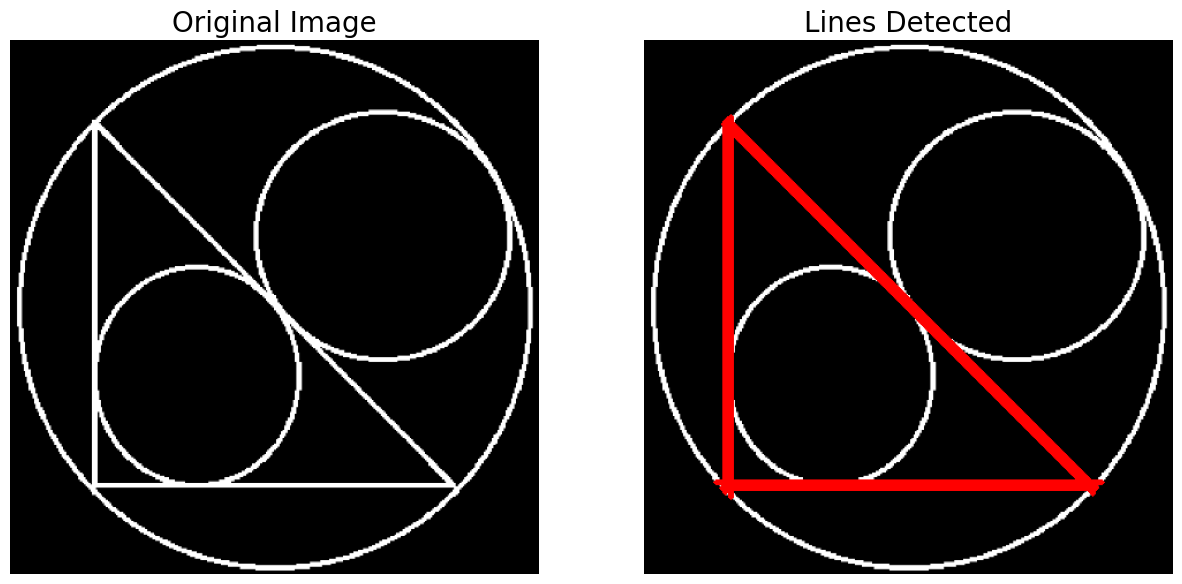

In [2]:
# Read image
img = cv2.imread('image1.PNG') # road.png is the filename
# Convert the image to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the edges in the image using canny detector
edges = cv2.Canny(gray, 50, 200)

# Detect points that form a line
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 70, minLineLength=10,maxLineGap=200)

# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)

# Show result
plt.figure(figsize=(15,15))
plt.subplot(121),plot_image(gray, 'Original Image')
plt.subplot(122),plot_image(img, 'Lines Detected')

### B. Detecting Circles

The process goes about the same as for lines, with the exception that this time we will use a different function from the OpenCV library. We will use now HoughCircles, which accepts the following parameters:

* image: The input image.
* method: Detection method.
* dp: the Inverse ratio of accumulator resolution and image resolution.
* mindst: minimum distance between centers od detected circles.
* param1: First method-specific parameter. In case of CV_HOUGH_GRADIENT , it is the higher threshold of the two passed to the Canny() edge detector (the lower one is twice smaller).
* param2: Second method-specific parameter. In case of CV_HOUGH_GRADIENT , it is the accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected. Circles, corresponding to the larger accumulator values, will be returned first.
* min_Radius: minimum radius of the circle to be detected.
* max_Radius: maximum radius to be detected.

(<Axes: title={'center': 'Circles Detected'}>, None)

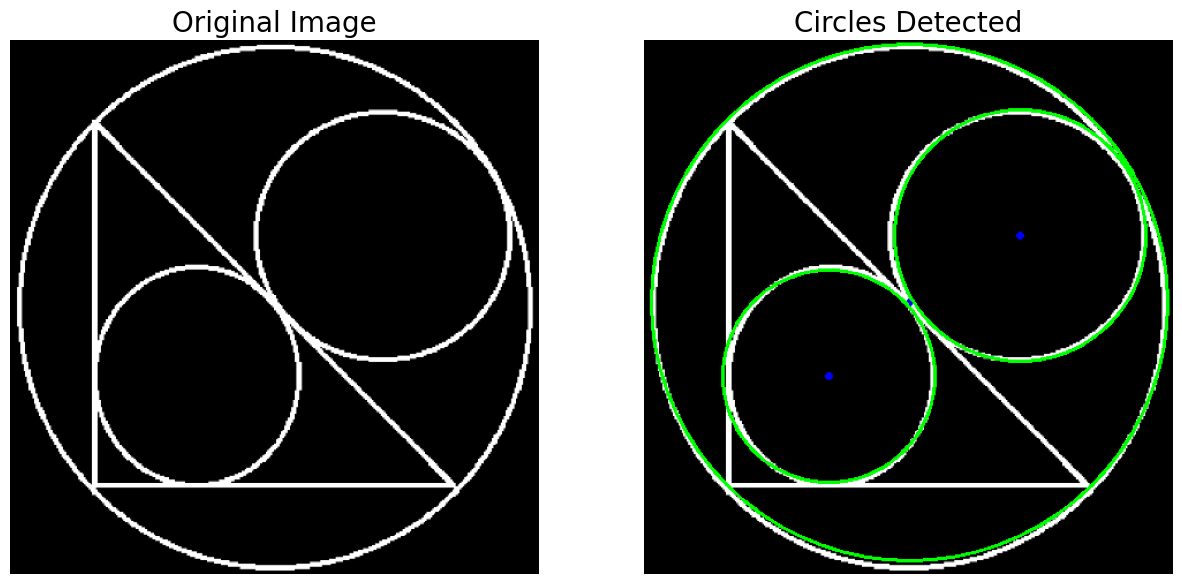

In [3]:
# Read image as gray-scale
img = cv2.imread('image1.PNG', cv2.IMREAD_COLOR)
# Convert to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image to reduce noise
img_blur = cv2.medianBlur(gray, 5)
# Apply hough transform on the image
circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, 90, param1=70, param2=50, minRadius=0, maxRadius=0)

# Draw detected circles
circles = np.uint16(np.around(circles))
if circles is not None:
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw inner circle
        cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 2)
        
# Show result
plt.figure(figsize=(15,15))
plt.subplot(121),plot_image(gray, 'Original Image')
plt.subplot(122),plot_image(img, 'Circles Detected')

## 1.2 Thresholding and Otsu's segmentation

Thresholding refers to a family of algorithms that use a pixel value as a threshold to create a binary image (an image with only black-and-white pixels) from a grayscale image. It provides the simplest way to segment objects from a background in an image.

In this lab, we shall only discuss a popular histogram-based thresholding method known as Otsu's method. It computes a optimal threshold value by simultaneously maximizing the inter-class variance and minimizing the intra-class variance between two classes of pixels (which are separated by that threshold value).

### Otsu’s Thresholding Concept

Automatic global thresholding algorithms usually have following steps.

* Process the input image
* Obtain image histogram (distribution of pixels)
* Compute the threshold value T
* Replace image pixels into white in those regions, where saturation is greater than T and into the black in the opposite cases.

### 1. Read Image.
First, we need to read image in a grayscale mode and its possible improvement with a Gaussian blur in order to reduce the noise:

In [4]:
# Read the image in a grayscale mode
image = cv2.imread('image2.PNG', 0)
# Apply GaussianBlur to reduce image noise
image = cv2.GaussianBlur(image, (5, 5), 0)


### 2. Implement Thresholding

To apply Otsu’s technique we simply need to use OpenCV threshold function with set THRESH_OTSU flag:

(<Axes: title={'center': 'Histogram Otsu with Gaussian filtering 113.0'}>,
 None)

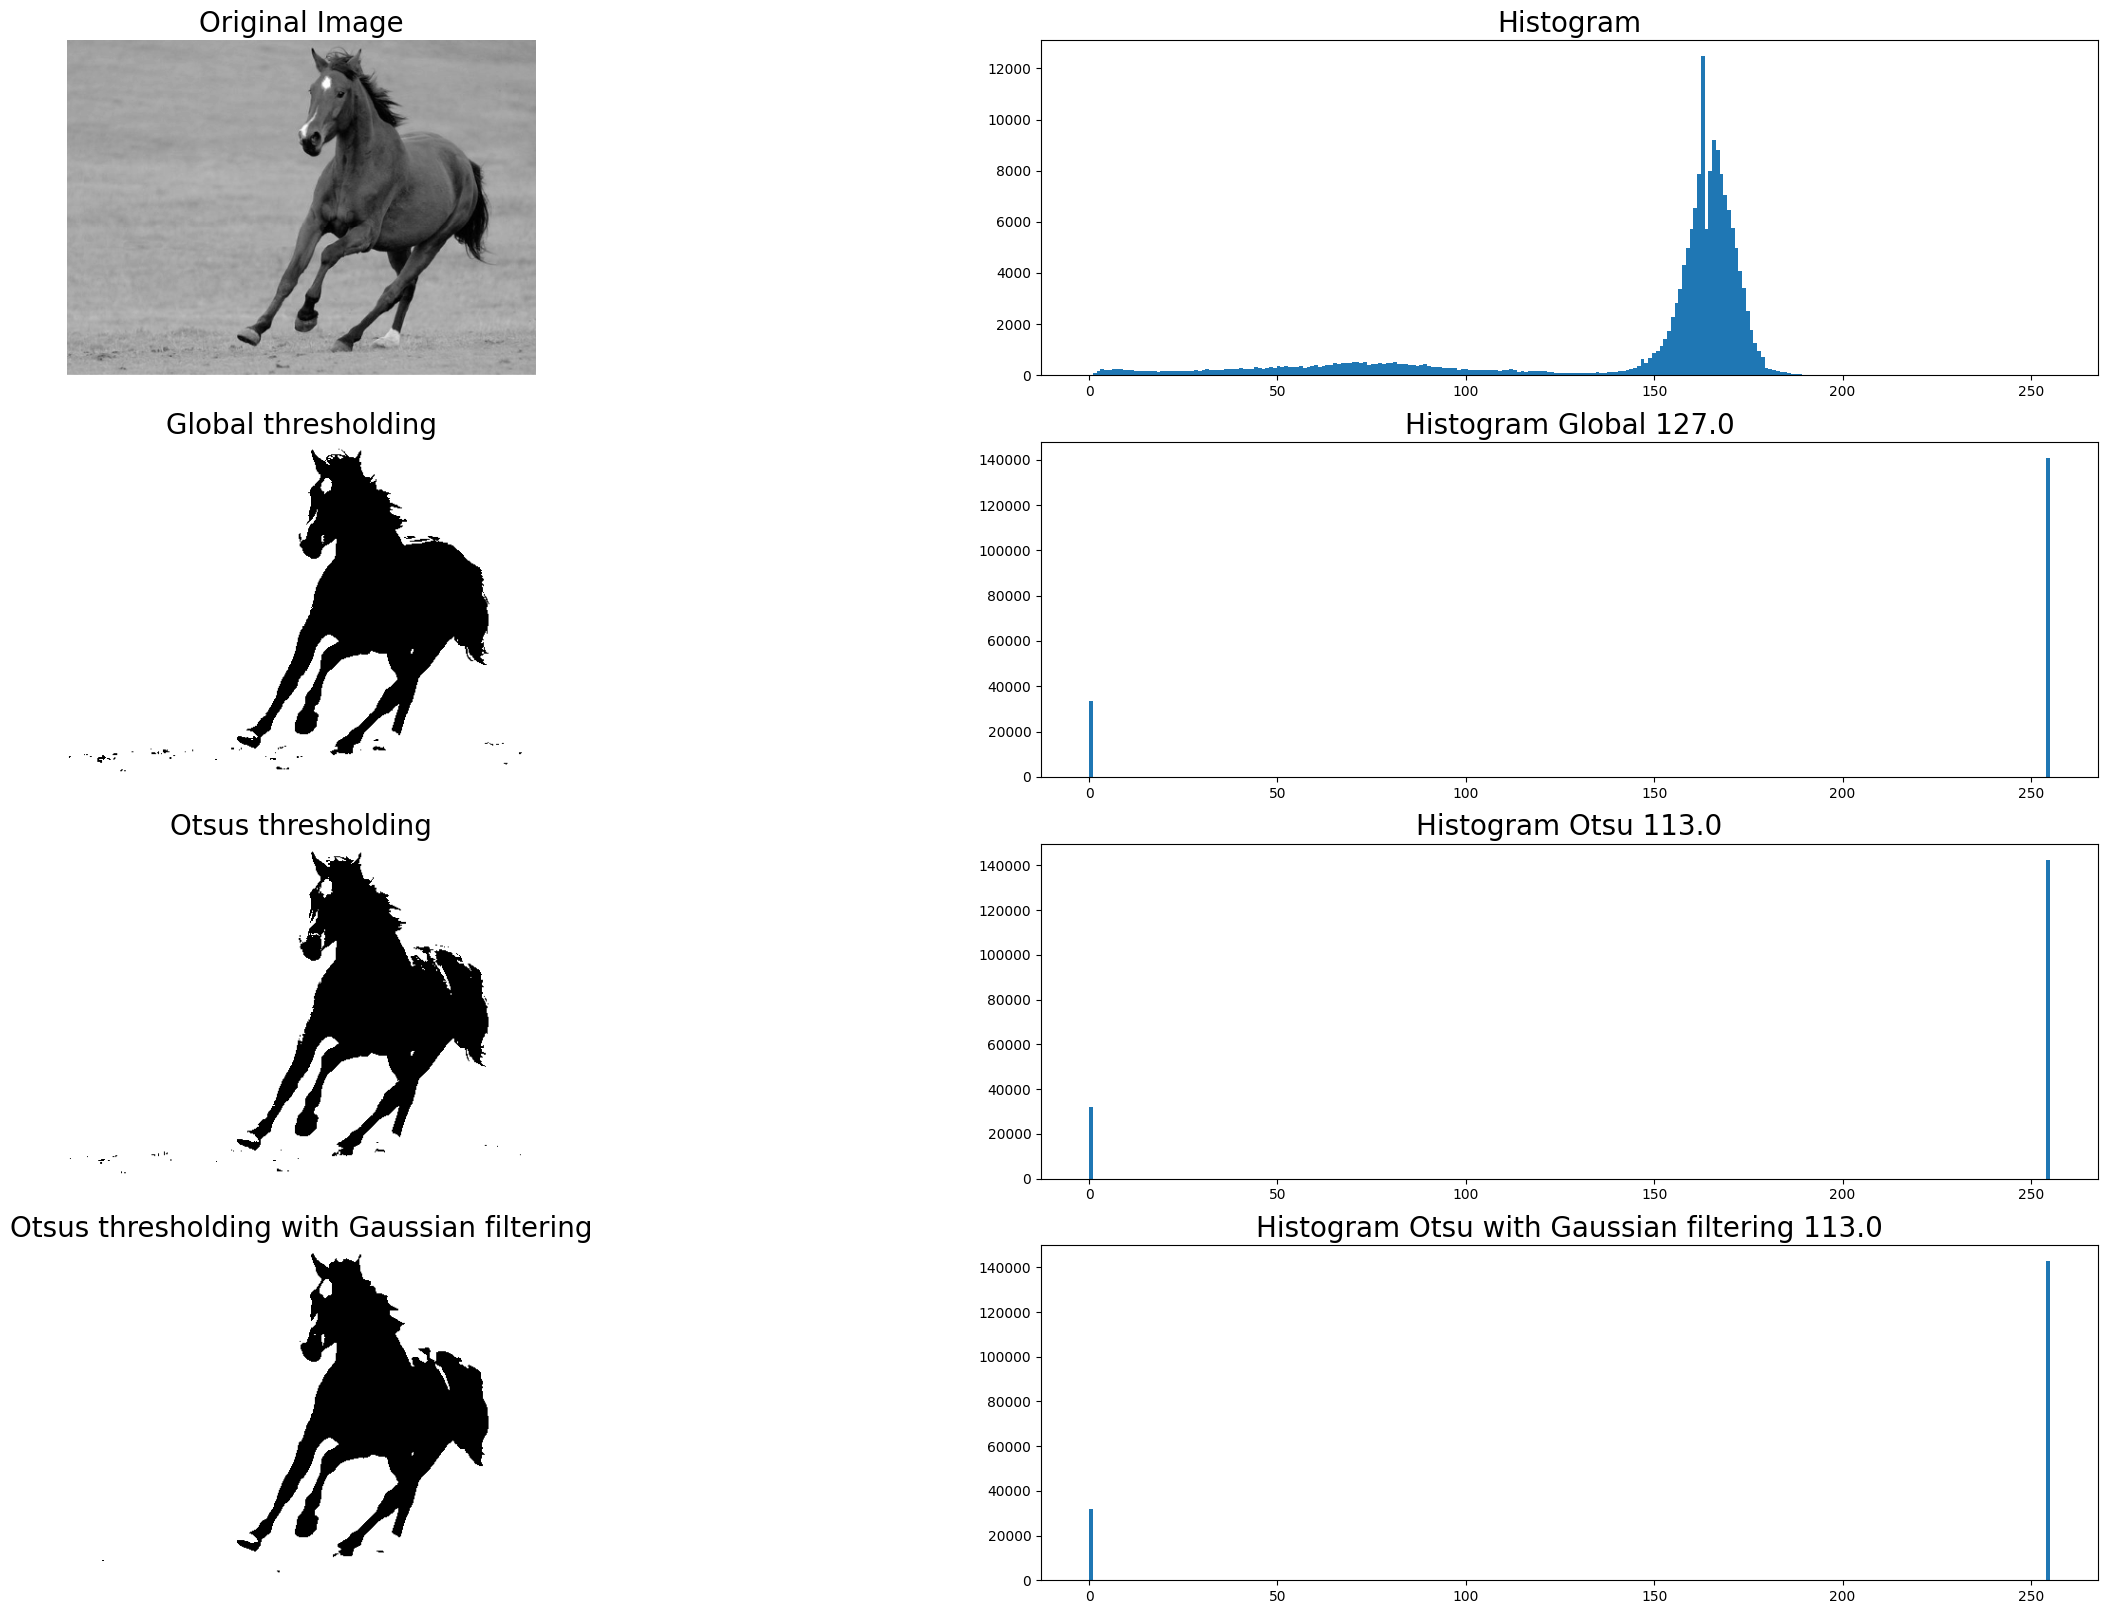

In [5]:
   
img = cv2.imread('image2.png',0)
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms

# Show result
plt.figure(figsize=(30,20))
plt.subplot(421),plot_image(img, 'Original Image')
plt.subplot(422),plot_hist(img, 'Histogram')
plt.subplot(423),plot_image(th1, 'Global thresholding')
plt.subplot(424),plot_hist(th1, 'Histogram Global ' + str(ret1))
plt.subplot(425),plot_image(th2, 'Otsus thresholding')
plt.subplot(426),plot_hist(th2, 'Histogram Otsu '+ str(ret2))
plt.subplot(427),plot_image(th3, 'Otsus thresholding with Gaussian filtering')
plt.subplot(428),plot_hist(th3, 'Histogram Otsu with Gaussian filtering ' + str(ret3))

# Part 2: Lab Tasks

## Task 1: Given with an image of coins (left image), count the number of coins within the image as shown in the right image.

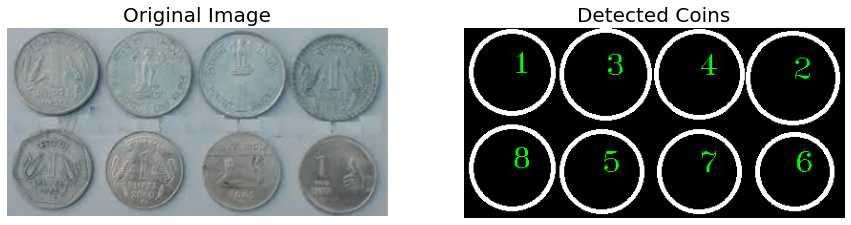

(<Axes: title={'center': 'Circles Detected'}>, None)

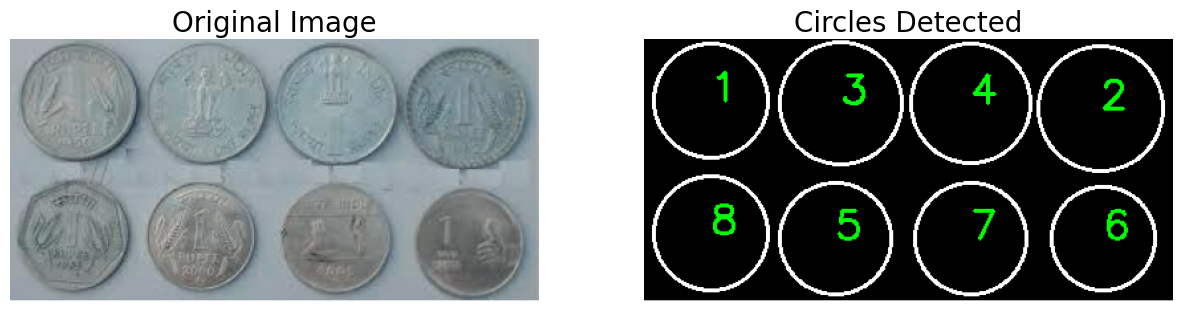

In [19]:

# Read image as gray-scale
img = cv2.imread('coins.PNG', cv2.IMREAD_COLOR)
img1 = cv2.imread('coins.PNG', cv2.IMREAD_COLOR)

# Convert to gray-scale
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# Blur the image to reduce noise
img_blur = cv2.medianBlur(gray, 5)


# Apply hough transform on the image
circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, 90, param1=70, param2=50, minRadius=0, maxRadius=0)
counter = 1
circles = np.uint16(np.around(circles))
if circles is not None:
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(img1, (i[0], i[1]), i[2], (255, 255, 255), 2)
        cv2.putText(img1, str(counter), (i[0], i[1]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2, cv2.LINE_AA)
        counter += 1

ret1,th1 = cv2.threshold(img1,220,255,cv2.THRESH_BINARY)
        
# Show result
plt.figure(figsize=(15,15))
plt.subplot(121),plot_image(img, 'Original Image')
plt.subplot(122),plot_image(th1, 'Circles Detected')

## Task 2: Given with an image on the left, do the necessary operation to visibly show all numbers as shown in the rigth image. 

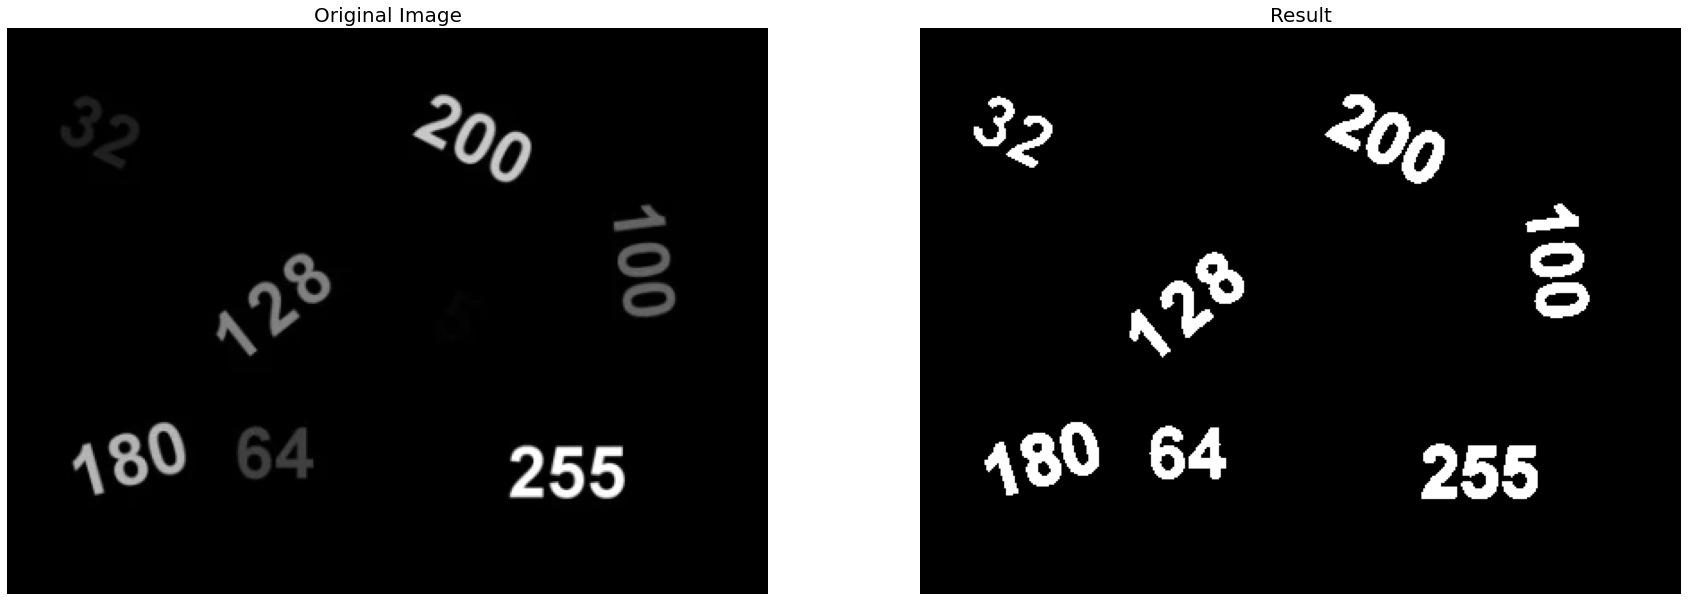

(<Axes: title={'center': 'New Image'}>, None)

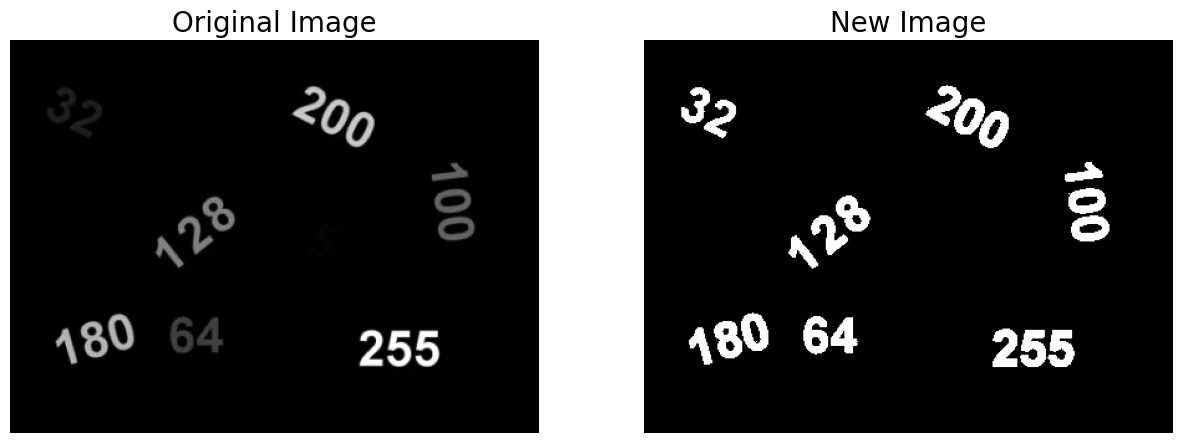

In [25]:
# Load image
img = cv2.imread('Task2.png', cv2.IMREAD_GRAYSCALE)

# Apply erosion
kernel = np.ones((5,5),np.uint8)
eroded = cv2.erode(img, kernel, iterations=1)

# Apply dilation only to color values less than 128
img_copy = img.copy()
mask = cv2.threshold(img_copy, 128, 128, cv2.THRESH_BINARY)[1]
dilated_mask = cv2.dilate(mask, kernel, iterations=1)
img_copy[dilated_mask == 255] = cv2.dilate(img_copy, kernel, iterations=1)[dilated_mask == 255]

# Apply contrast stretching
p1, p2 = np.percentile(dilated_mask, (5, 95))
stretched = cv2.normalize(img_copy, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
stretched = cv2.convertScaleAbs(stretched)

# Apply binary thresholding
thresh = cv2.threshold(stretched, 10, 128, cv2.THRESH_BINARY)[1]

# Applyopening
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Show result
plt.figure(figsize=(15,15))
plt.subplot(121),plot_image(img, 'Original Image')
plt.subplot(122),plot_image(thresh, 'New Image')